<a href="https://colab.research.google.com/github/nehaljain21/Ecommerce-recommendation-model/blob/main/CommerceSense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving modcloth_final_data.json to modcloth_final_data.json


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_json("modcloth_final_data.json",lines=True)

In [ ]:
df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(82790, 18)

In [ ]:
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [ ]:
df.describe()

,item_id,waist,size,quality,hips,bra size,user_id,shoe size
count,82790.000000,2882.000000,82790.000000,82722.000000,56064.000000,76772.000000,82790.000000,27915.000000
mean,469325.229170,31.319223,12.661602,3.949058,40.358501,35.972125,498849.564718,8.145818
std,213999.803314,5.302849,8.271952,0.992783,5.827166,3.224907,286356.969459,1.336109
min,123373.000000,20.000000,0.000000,1.000000,30.000000,28.000000,6.000000,5.000000
25%,314980.000000,28.000000,8.000000,3.000000,36.000000,34.000000,252897.750000,7.000000
50%,454030.000000,30.000000,12.000000,4.000000,39.000000,36.000000,497913.500000,8.000000
75%,658440.000000,34.000000,15.000000,5.000000,43.000000,38.000000,744745.250000,9.000000
max,807722.000000,50.000000,38.000000,5.000000,60.000000,48.000000,999972.000000,38.000000


In [ ]:
df.isna().sum()

,0
item_id,0
waist,79908
size,0
quality,68
cup size,6255
hips,26726
bra size,6018
category,0
bust,70936
height,1107


In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [ ]:
df.drop(columns=['waist', 'hips', 'bust', 'shoe_width', 'user_name', 'review_summary', 'review_text'], inplace=True)

In [ ]:
for col in ['quality', 'bra_size', 'shoe_size']:
    df[col].fillna(df[col].median(),inplace=True)
for col in ['cup_size', 'category', 'fit', 'length']:
    df[col].fillna('unknown', inplace=True)

/tmp/ipython-input-3805885248.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
/tmp/ipython-input-3805885248.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
def height_to_inches(h):
    if pd.isna(h):
        return np.nan
    h = str(h)
    parts = h.replace("ft", "").replace("in", "").split()
    if len(parts) == 2:
        feet = int(parts[0])
        inches = int(parts[1])
        total_inches = feet * 12 + inches
        return total_inches
    elif len(parts) == 1:
        feet = int(parts[0])
        return feet * 12
    else:
        return np.nan
df['height_inches'] = df['height'].apply(height_to_inches)
df.drop(columns=['height'], inplace=True)
df['height_inches'].fillna(df['height_inches'].median(), inplace=True)

/tmp/ipython-input-3392225277.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['height_inches'].fillna(df['height_inches'].median(), inplace=True)


In [ ]:
df.isna().sum()

,0
item_id,0
size,0
quality,0
cup_size,0
bra_size,0
category,0
length,0
fit,0
user_id,0
shoe_size,0


In [ ]:
df.to_csv("clothing_data_clean.csv", index=False)

In [ ]:
from google.colab import files
files.download("clothing_data_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Working with Cleaned CSV File**

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving clothing_data_clean.csv to clothing_data_clean (1).csv


In [ ]:
import pandas as pd
df=pd.read_csv("clothing_data_clean.csv")

In [ ]:
df.head()

,item_id,size,quality,cup_size,bra_size,category,length,fit,user_id,shoe_size,height_inches
0,123373,7,5.0,d,34.0,new,just right,small,991571,8.0,66.0
1,123373,13,3.0,b,36.0,new,just right,small,587883,8.0,62.0
2,123373,7,2.0,b,32.0,new,slightly long,small,395665,9.0,67.0
3,123373,21,5.0,dd/e,36.0,new,just right,fit,875643,8.0,65.0
4,123373,18,5.0,b,36.0,new,slightly long,small,944840,8.0,62.0


In [ ]:
df.shape

(82790, 11)

In [ ]:
df.columns

Index(['item_id', 'size', 'quality', 'cup_size', 'bra_size', 'category',
       'length', 'fit', 'user_id', 'shoe_size', 'height_inches'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_id        82790 non-null  int64  
 1   size           82790 non-null  int64  
 2   quality        82790 non-null  float64
 3   cup_size       82790 non-null  object 
 4   bra_size       82790 non-null  float64
 5   category       82790 non-null  object 
 6   length         82790 non-null  object 
 7   fit            82790 non-null  object 
 8   user_id        82790 non-null  int64  
 9   shoe_size      82790 non-null  float64
 10  height_inches  82790 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,item_id,size,quality,bra_size,user_id,shoe_size,height_inches
count,82790.000000,82790.000000,82790.000000,82790.000000,82790.000000,82790.000000,82790.000000
mean,469325.229170,12.661602,3.949100,35.974151,498849.564718,8.049167,65.144462
std,213999.803314,8.271952,0.992376,3.105494,286356.969459,0.778886,2.833398
min,123373.000000,0.000000,1.000000,28.000000,6.000000,5.000000,36.000000
25%,314980.000000,8.000000,3.000000,34.000000,252897.750000,8.000000,63.000000
50%,454030.000000,12.000000,4.000000,36.000000,497913.500000,8.000000,65.000000
75%,658440.000000,15.000000,5.000000,38.000000,744745.250000,8.000000,67.000000
max,807722.000000,38.000000,5.000000,48.000000,999972.000000,38.000000,95.000000


In [ ]:
df.isna().sum()

,0
item_id,0
size,0
quality,0
cup_size,0
bra_size,0
category,0
length,0
fit,0
user_id,0
shoe_size,0


In [ ]:
print("Unique users: ", df['user_id'].nunique())
print("Unique items: ", df['item_id'].nunique())

Unique users:  47958
Unique items:  1378


In [ ]:
print(f"Avg interactions per user: {df['user_id'].value_counts().mean():.2f}")
print(f"Avg interactions per item: {df['item_id'].value_counts().mean():.2f}")

Avg interactions per user: 1.73
Avg interactions per item: 60.08


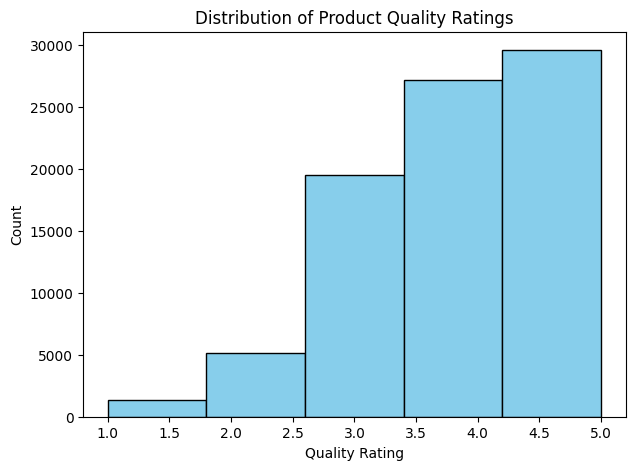

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
df['quality'].plot(kind='hist', bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.title('Distribution of Product Quality Ratings')
plt.show()

category
new          21488
tops         20364
dresses      18650
bottoms      15266
outerwear     4223
sale          2524
wedding        275
Name: count, dtype: int64


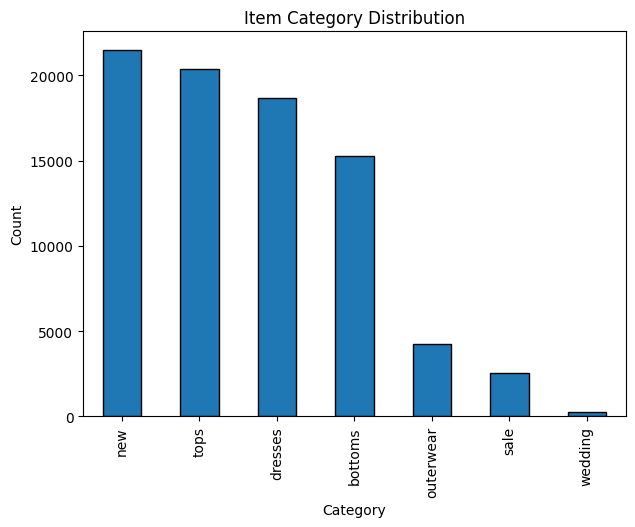

In [ ]:
plt.figure(figsize=(7,5))
df['category'].value_counts().plot(kind='bar', edgecolor='black')
print(df['category'].value_counts())
plt.title('Item Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
df.groupby('category')['quality'].mean().sort_values()

,quality
category,
new,3.866251
tops,3.942742
bottoms,3.966461
dresses,4.004933
sale,4.005943
outerwear,4.034336
wedding,4.312727


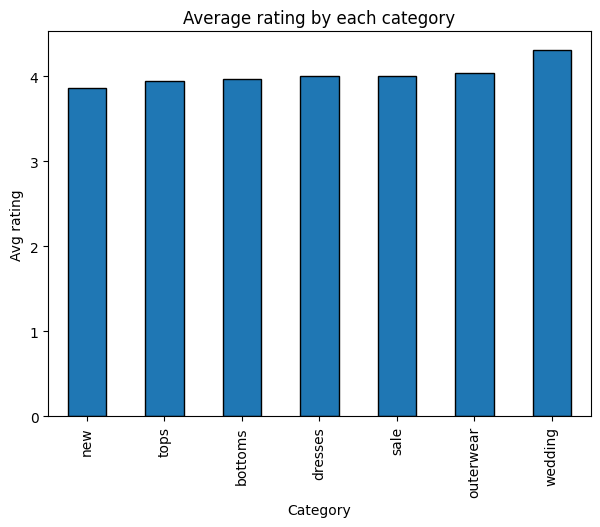

In [ ]:
plt.figure(figsize=(7,5))
df.groupby('category')['quality'].mean().sort_values().plot(kind='bar', edgecolor='black')
plt.title('Average rating by each category')
plt.xlabel('Category')
plt.ylabel('Avg rating')
plt.show()

In [ ]:
for col in ['size', 'bra_size', 'shoe_size', 'height_inches','quality']:
    print(col, df[col].min(), '-',df[col].max())

size 0 - 38
bra_size 28.0 - 48.0
shoe_size 5.0 - 38.0
height_inches 36.0 - 95.0
quality 1.0 - 5.0


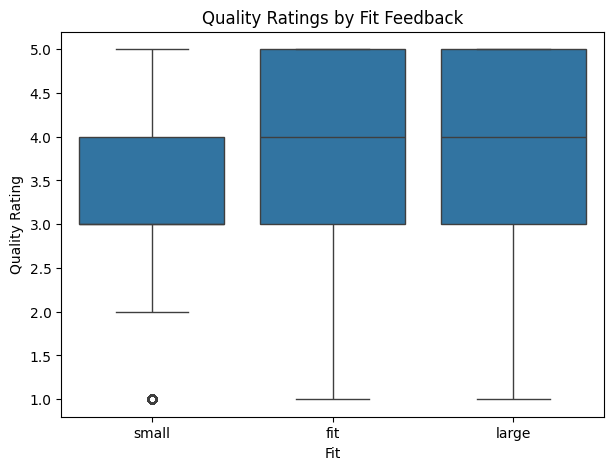

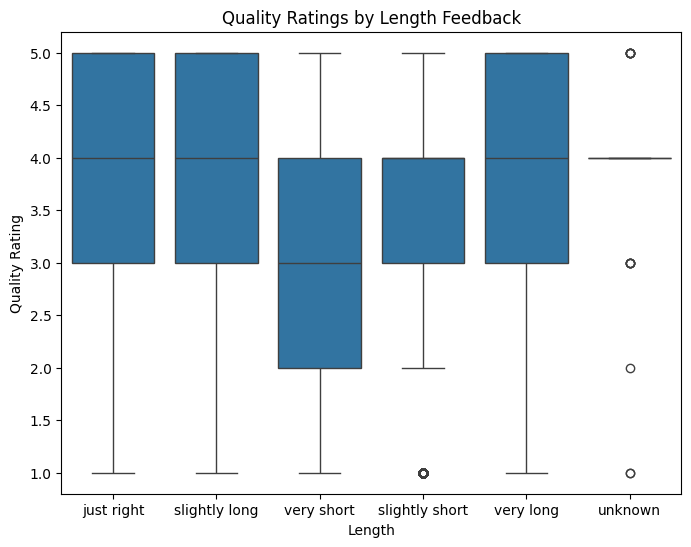

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.boxplot(x='fit', y='quality', data=df)
plt.xlabel('Fit')
plt.ylabel('Quality Rating')
plt.title('Quality Ratings by Fit Feedback')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='length', y='quality', data=df)
plt.xlabel('Length')
plt.ylabel('Quality Rating')
plt.title('Quality Ratings by Length Feedback')
plt.show()

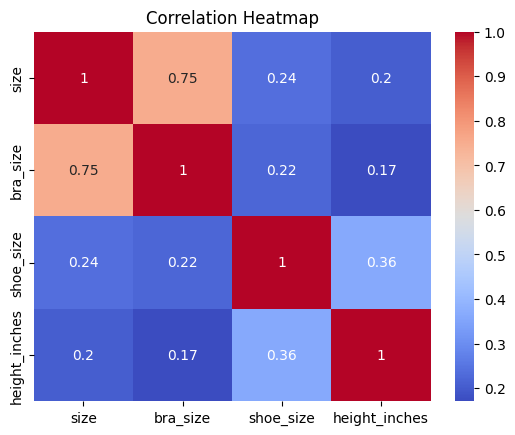

In [ ]:
corr = df[['size', 'bra_size', 'shoe_size', 'height_inches']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Insights**

The dataset represents product and customer feedback data from an e-commerce platform specializing in women's clothing, containing **82,790** records across 11 key attributes- item_id, size, quality, cup_size, bra_size, category, length, fit, user_id, shoe_size, and height_inches.

Key Observations from **Exploratory Data Analysis (EDA)**:

- The dataset consists of 47,958 unique users and 1,378 unique clothing items, with an average of 1.73 interactions per user and around 60 interactions per item.

- Category Distribution: The clothing categories are dominated by such as new- 21,488 interactions, tops- 20,364 interactions and dresses- 18,650 interactions *(as visualized in bar plot)*.

- Average Quality Rating by Category: *(as depicted using bar plot)*

  New: 3.87

  Tops: 3.94

  Bottoms: 3.97

  Dresses: 4.00

  Sale: 4.01

  Outerwear: 4.03

  Wedding: 4.31

Items in wedding and outerwear categories received the highest average quality ratings, while new arrivals tended to score slightly lower.

- Numerical Features Ranges:

  size: 0 - 38

  bra_size: 28 - 48

  shoe_size: 5 - 38

  height_inches: 36 - 95

  quality: 1 - 5 *(as visualized in histogram of quality distribution)*
The rating distribution is focussed towards higher scores (3-5), suggesting generally positive customer experiences.

- Box Plot - Quality Ratings by Fit Feedback:

Products rated highest in quality when the fit was “fit” or “large”.
Items labeled as “small” showed lower and more variable quality ratings, with some clear outliers.

- Box Plot - Quality Ratings by Length Feedback:

Items described as “just right”, “slightly long”, or “very long” had higher median quality (~4).
Products marked “very short” had noticeably lower quality ratings (median ~3).

- Correlation Heatmap Insights (Size & Body Measurements):

Size and bra size show a strong positive correlation (~0.75) - larger clothing sizes align closely with larger bust sizes.

Shoe size correlates weakly to moderately with both size (0.24) and height (0.36), indicating that taller individuals tend to wear slightly larger sizes.

Height shows a mild positive relationship with size (0.20) and bra size (0.17).

In [ ]:
df = df[['user_id', 'item_id', 'quality']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
user_enc = LabelEncoder()
item_enc = LabelEncoder()
df['user'] = user_enc.fit_transform(df['user_id'])
df['item'] = item_enc.fit_transform(df['item_id'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['rating'] = scaler.fit_transform(df[['quality']])

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
n_users = df['user'].nunique()
n_items = df['item'].nunique()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
embedding_size = 64
user_input = layers.Input(shape=(1,))
item_input = layers.Input(shape=(1,))
user_embedding = layers.Embedding(input_dim=n_users, output_dim=embedding_size)(user_input)
item_embedding = layers.Embedding(input_dim=n_items, output_dim=embedding_size)(item_input)
user_flat = layers.Flatten()(user_embedding)
item_flat = layers.Flatten()(item_embedding)
concat = layers.Concatenate()([user_flat, item_flat])
hidden = layers.Dense(128, activation='relu')(concat)
hidden = layers.Dropout(0.3)(hidden)
hidden = layers.Dense(64, activation='relu')(hidden)
hidden = layers.Dropout(0.3)(hidden)
output = layers.Dense(1, activation='sigmoid')(hidden)

In [ ]:
model = models.Model(inputs=[user_input, item_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 64)     │  3,069,312 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 64)     │     88,192 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 64)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 64)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     16,512 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,182,337 (12.14 MB)

 Trainable params: 3,182,337 (12.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_user_input = train['user'].values
train_item_input = train['item'].values
train_ratings = train['rating'].values

In [ ]:
model.fit([train_user_input, train_item_input], train_ratings, batch_size=64, epochs=15, validation_split=0.1,verbose=1)


Epoch 1/15
932/932 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - AUC: 0.5776 - loss: 0.5789 - val_AUC: 0.6763 - val_loss: 0.5560
Epoch 2/15
932/932 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - AUC: 0.8099 - loss: 0.5073 - val_AUC: 0.6560 - val_loss: 0.5675
Epoch 3/15
932/932 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - AUC: 0.8757 - loss: 0.4710 - val_AUC: 0.6719 - val_loss: 0.5885
Epoch 4/15
932/932 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - AUC: 0.9236 - loss: 0.4459 - val_AUC: 0.6753 - val_loss: 0.6064
Epoch 5/15
932/932 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - AUC: 0.9562 - loss: 0.4311 - val_AUC: 0.6685 - val_loss: 0.6252
Epoch 6/15
932/932 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - AUC: 0.9702 - loss: 0.4243 - val_AUC: 0.6545 - val_loss: 0.6533
Epoch 7/15
932/932 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - AUC: 0.9748 - loss: 0.4197 - val_AUC: 0.6600 - val_loss: 0.6783
Epoch 8/15
932/932 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - AUC: 0.9849 - loss: 0.4110 - val_AUC: 0.6660 - val_loss: 0.6907
Epoch 9/15
932/932 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
test_user_input = test['user'].values
test_item_input = test['item'].values
test_ratings = test['rating'].values

In [ ]:
from sklearn.metrics import roc_auc_score
test_predictions = model.predict([test_user_input, test_item_input])
test_ratings_binary = (test_ratings >= 0.5).astype(int)
auc = roc_auc_score(test_ratings_binary, test_predictions)
print(f"AUC: {auc:.4f}")


518/518 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
AUC: 0.6565


In [ ]:
    import numpy as np
def precision_recall_at_k(y_true, y_pred, k=10):
    idx = np.argsort(-y_pred, axis=0).reshape(-1)
    top_k_idx = idx[:k]
    relevant = np.where(y_true == 1)[0]
    intersection = len(np.intersect1d(top_k_idx, relevant))
    precision = intersection / k
    recall = intersection / len(relevant) if len(relevant) > 0 else 0
    return precision, recall
precision, recall = precision_recall_at_k(test_ratings, test_predictions, k=10)
print(f"Precision@10: {precision:.4f}")
print(f"Recall@10: {recall:.4f}")

Precision@10: 0.8000
Recall@10: 0.0014
